need to install all these dependencies
pip/pip3 install keras
pip/pip3 install matplotlib
pip/pip3 install numpy
pip/pip3 install tensorflow

In [1]:
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
import matplotlib.pyplot as plot
import numpy as np
import random
import time

Using TensorFlow backend.


Import the mnist data set and ensure the data is shaped properly.
The original data is a (28, 28) pixel greyscale image. We need to flatten it for the network.
Need a 1 dimensional array for the input (784, ) and a 1 dimensional array for the output (10,) but we have 60,000 data points. So we end up with (60000, 784) and (60000, 10)

In [2]:
num_classes = 10
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Just to show you what the data looks like

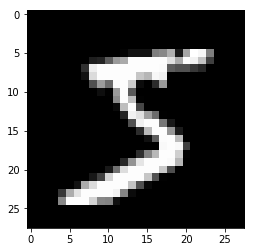

In [3]:
plot.imshow(x_train[0].reshape(28, 28), cmap='gray')
plot.show()

We are using a fully connected feed forward neural network - "Sequential" makes it feed forward, "Dense" makes it fully connected.

We're using a relu (rectified linear units)[https://en.wikipedia.org/wiki/Rectifier_(neural_networks)] activation in the hidden layer - it's often recommended for hidden layers in image based problems - not sure why :P

We're using softmax in the final layer - it's similar to relu. For some reason, if you replace softmax with relu then the loss will be nan most of the time - not sure why

Categorical Crossentropy [https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/] is used as the loss function. I think it's the de-facto loss function for categorisation problems. MSE is used in linear regression but is not suitable for categorisation

The optimizer is RMSProp - Stochastic Gradient Descent caused problems for some reason

Accuracy is added as a metric - it is simply the percentage of the training set that it guesses correctly. A random guesser we would expect to get 0.1 accuracy. A human, close to 1 accuracy

In [4]:
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=x_train.shape[1:]))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
             metrics=["accuracy"])

In [5]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 20s 337us/step - loss: 10.4486 - acc: 0.3507
Epoch 2/100
60000/60000 [==============================] - 15s 245us/step - loss: 9.2087 - acc: 0.4279
Epoch 3/100
60000/60000 [==============================] - 15s 250us/step - loss: 8.9015 - acc: 0.4470
Epoch 4/100
60000/60000 [==============================] - 14s 241us/step - loss: 8.7020 - acc: 0.4596
Epoch 5/100
60000/60000 [==============================] - 16s 274us/step - loss: 8.6468 - acc: 0.46320s - loss: 8.6494 - acc: 0
Epoch 6/100
60000/60000 [==============================] - 14s 236us/step - loss: 7.6542 - acc: 0.5244
Epoch 7/100
60000/60000 [==============================] - 14s 235us/step - loss: 7.3192 - acc: 0.5454
Epoch 8/100
60000/60000 [==============================] - 14s 226us/step - loss: 7.2140 - acc: 0.5520
Epoch 9/100
60000/60000 [==============================] - 14s 226us/step - loss: 7.1880 - acc: 0.5538
Epoch 10/100
60000/60000 [====================

60000/60000 [==============================] - 17s 291us/step - loss: 6.7896 - acc: 0.5787
Epoch 79/100
60000/60000 [==============================] - 13s 218us/step - loss: 6.7468 - acc: 0.5813
Epoch 80/100
60000/60000 [==============================] - 13s 225us/step - loss: 6.6444 - acc: 0.5876
Epoch 81/100
60000/60000 [==============================] - 15s 257us/step - loss: 5.7528 - acc: 0.6430
Epoch 82/100
60000/60000 [==============================] - 15s 255us/step - loss: 5.5553 - acc: 0.6551
Epoch 83/100
60000/60000 [==============================] - 13s 214us/step - loss: 5.4993 - acc: 0.6586
Epoch 84/100
60000/60000 [==============================] - 14s 236us/step - loss: 5.4179 - acc: 0.6637
Epoch 85/100
60000/60000 [==============================] - 14s 231us/step - loss: 5.3556 - acc: 0.6676
Epoch 86/100
60000/60000 [==============================] - 14s 233us/step - loss: 5.4354 - acc: 0.6627
Epoch 87/100
60000/60000 [==============================] - 15s 247us/step - 

We evaluate the model against test data. If the accuracy and loss here are dramatically different to the training data, then we know that our model has overfitted to the training data and will not be useful in real world applications

In [6]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 90us/step


[5.2770789535522464, 0.67249999999999999]

This is just a demonstration of the predictive abilities of the trained network - highlight it and hit ctrl+enter to run it against a new random member from the data set

Prediction:  5
--------------


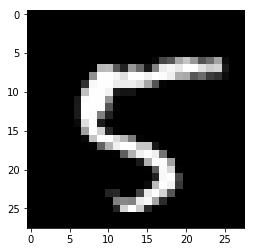

In [12]:
random_mnist_character = random.choice(x_train)
result = np.argmax(model.predict(np.array([random_mnist_character])))
print("Prediction: ", result)
print("--------------")

plot.imshow(random_mnist_character.reshape(28,28), cmap='gray')
plot.show()

Here is a bunch of quick comparisons of different optimizers. Lower loss, higher accuracy is better.

In [8]:
# Root Mean Square Propagation
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=x_train.shape[1:]))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy",
              optimizer="RMSProp",
             metrics=["accuracy"])

model.fit(x_train, y_train, epochs=10)

result = model.evaluate(x_test, y_test)
print("loss: ", result[0])
print("accuracy: ", result[1])

Epoch 1/10
60000/60000 [==============================] - 10s 160us/step - loss: 9.6918 - acc: 0.3963
Epoch 2/10
60000/60000 [==============================] - 9s 154us/step - loss: 7.1460 - acc: 0.5549
Epoch 3/10
60000/60000 [==============================] - 9s 146us/step - loss: 7.0025 - acc: 0.5642
Epoch 4/10
60000/60000 [==============================] - 8s 135us/step - loss: 6.9437 - acc: 0.5680
Epoch 5/10
60000/60000 [==============================] - 9s 142us/step - loss: 6.8591 - acc: 0.5734
Epoch 6/10
60000/60000 [==============================] - 9s 148us/step - loss: 6.8346 - acc: 0.5750
Epoch 7/10
60000/60000 [==============================] - 9s 147us/step - loss: 6.7897 - acc: 0.5780
Epoch 8/10
60000/60000 [==============================] - 11s 177us/step - loss: 6.7977 - acc: 0.5774
Epoch 9/10
60000/60000 [==============================] - 11s 188us/step - loss: 6.7291 - acc: 0.5817
Epoch 10/10
10000/10000 [==============================] - 1s 108us/step
loss:  6.654262

In [9]:
# Stochastic Gradient Descent
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=x_train.shape[1:]))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
             metrics=["accuracy"])

model.fit(x_train, y_train, epochs=10)

result = model.evaluate(x_test, y_test)
print("loss: ", result[0])
print("accuracy: ", result[1])

Epoch 1/10
60000/60000 [==============================] - 9s 153us/step - loss: 13.7503 - acc: 0.1468
Epoch 2/10
60000/60000 [==============================] - 9s 147us/step - loss: 13.3097 - acc: 0.1742
Epoch 3/10
60000/60000 [==============================] - 9s 153us/step - loss: 13.2397 - acc: 0.1786
Epoch 4/10
60000/60000 [==============================] - 8s 138us/step - loss: 13.3016 - acc: 0.1747
Epoch 5/10
60000/60000 [==============================] - 9s 143us/step - loss: 13.5371 - acc: 0.1601
Epoch 6/10
60000/60000 [==============================] - 9s 150us/step - loss: 13.2819 - acc: 0.1759
Epoch 7/10
60000/60000 [==============================] - 8s 138us/step - loss: 13.2061 - acc: 0.1807
Epoch 8/10
60000/60000 [==============================] - 8s 140us/step - loss: 13.6026 - acc: 0.1560
Epoch 9/10
60000/60000 [==============================] - 9s 157us/step - loss: 13.6476 - acc: 0.1533
Epoch 10/10
10000/10000 [==============================] - 1s 81us/step
loss:  14.

In [10]:
# Adaptive Moment Estimation
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=x_train.shape[1:]))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
             metrics=["accuracy"])

model.fit(x_train, y_train, epochs=10)

result = model.evaluate(x_test, y_test)
print("loss: ", result[0])
print("accuracy: ", result[1])

Epoch 1/10
60000/60000 [==============================] - 9s 156us/step - loss: 6.0552 - acc: 0.6187
Epoch 2/10
60000/60000 [==============================] - 9s 143us/step - loss: 4.6836 - acc: 0.7066
Epoch 3/10
60000/60000 [==============================] - 8s 128us/step - loss: 3.7277 - acc: 0.7656
Epoch 4/10
60000/60000 [==============================] - 8s 140us/step - loss: 2.9282 - acc: 0.8163
Epoch 5/10
60000/60000 [==============================] - 9s 151us/step - loss: 2.8776 - acc: 0.8194
Epoch 6/10
60000/60000 [==============================] - 9s 150us/step - loss: 2.8187 - acc: 0.8236
Epoch 7/10
60000/60000 [==============================] - 12s 194us/step - loss: 2.8173 - acc: 0.8236
Epoch 8/10
60000/60000 [==============================] - 9s 152us/step - loss: 2.7111 - acc: 0.8306
Epoch 9/10
60000/60000 [==============================] - 3s 57us/step - loss: 2.7452 - acc: 0.8286
Epoch 10/10
10000/10000 [==============================] - 0s 39us/step
loss:  2.6009791627